<a href="https://colab.research.google.com/github/marastika/-Environmental-Risk-Assessment-ERA-/blob/main/onlineshopSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [9]:
import pandas as pd

# Use pd.read_excel to read Excel files
dataset = pd.read_excel('/content/contoh_data_with_sentiment.xlsx')

In [10]:
dataset.shape

(300, 8)

In [11]:
dataset.head()

,Nama url toko,Toko,Product ID,Product Name,Rating,Review Text,Reviewer Name,Sentiment
0,https://www.tokopedia.com/lpcomp,LPComp,1847675209,Heatsink SSD M.2 NVMe NGFF M2 Pendingin Alumin...,5,"packing aman, sesuai deskripsi",A***e,Neutral
1,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral
2,https://www.tokopedia.com/lpcomp,LPComp,15108854831,Mousepad Desk Mat Besar Jumbo XL 2,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral
3,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,"packing aman, ukuran sesuai, warna oke",elia,Neutral
4,https://www.tokopedia.com/lpcomp,LPComp,7054761965,Laptop Keyboard Blanket Microfiber Screen Clea...,5,"packing aman, material bagus, mantap",elia,Neutral


In [12]:
import spacy
import pandas as pd
nlp = spacy.load('en_core_web_sm')
from spacy import displacy


In [13]:
import string
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
from spacy.lang.en.stop_words import STOP_WORDS

In [15]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)

    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()

        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens= []
    for token in tokens:
        if token not in STOP_WORDS and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [18]:
# Replace this line:
# text_data_cleaning(dataset["Review"][i])
# with this line:
text_data_cleaning(dataset["Review Text"][i]) # Column name is likely "Review Text"

['pack', 'aman', 'sesuai', 'deskripsi']

In [21]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Replace this line:
# text_data_cleaning(dataset["Review"][i])
# with this line:
text_data_cleaning(dataset["Review Text"][i]) # Column name is likely "Review Text"

['pack', 'aman', 'sesuai', 'deskripsi']

In [26]:
corpus=[]

# Change the loop range to the actual number of rows in the dataset
for i in range(0, len(dataset)):
  # Change 'Review' to 'Review Text'
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review Text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [27]:
corpus

['pack aman sesuai deskripsi',
 'barang sesuai deskripsi dan berfungsi dengan baik dipack dengan aman terima kasih gan',
 'barang sesuai deskripsi dan berfungsi dengan baik dipack dengan aman terima kasih gan',
 'pack aman ukuran sesuai warna oke',
 'pack aman materi bagu mantap',
 'pack aman motifnya keren banget ukurannya besar',
 'pack aman barang berfungsi dengan baik semoga awet',
 'bagu tebel kuylah bungku',
 'berfungsi dengan baik untuk sekrup macbook pengiriman aman dengan kardu kecil kokoh dikirim dengan cepat',
 'produk sesuai deskripsi sudah dite dan berfungsi dengan baik prose n pengiriman cepat pack aman n baik terimakasih',
 'pack mantaaap barang cepat sampai makasih',
 'secinta itu sama toko ini dan bnr rekomen bgt toko ini di kirim di hari yg sama sama pesanan hari ini pesen bsk samp luvv barangnya sesuai dengan deskripsi kualitasnya bagu dan pengirimannya cepat pelayanan ramah dan pack rapi barang sampai dalam kondisi sempurna harganya juga terjangkau dengan kualita ya

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [29]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[18 24]
 [ 5 13]]


0.5166666666666667

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
X_fresh = cv.transform(corpus).toarray()
X_fresh.shape

(300, 654)

In [37]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

['Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Neutral' 'Neutral' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral'
 'Neutral' 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Neutral' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Positive' 'Positive'
 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Positive'

In [38]:
dataset['predicted_label'] = y_pred.tolist()
dataset.head()

,Nama url toko,Toko,Product ID,Product Name,Rating,Review Text,Reviewer Name,Sentiment,predicted_label
0,https://www.tokopedia.com/lpcomp,LPComp,1847675209,Heatsink SSD M.2 NVMe NGFF M2 Pendingin Alumin...,5,"packing aman, sesuai deskripsi",A***e,Neutral,Positive
1,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,Neutral
2,https://www.tokopedia.com/lpcomp,LPComp,15108854831,Mousepad Desk Mat Besar Jumbo XL 2,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,Neutral
3,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,"packing aman, ukuran sesuai, warna oke",elia,Neutral,Neutral
4,https://www.tokopedia.com/lpcomp,LPComp,7054761965,Laptop Keyboard Blanket Microfiber Screen Clea...,5,"packing aman, material bagus, mantap",elia,Neutral,Neutral


In [40]:
import pandas as pd
import numpy as np

In [44]:
!pip install --upgrade pandas
import pandas as pd
import numpy as np

# Use pd.read_excel and specify the encoding if pandas version is compatible
try:
    df = pd.read_excel('/content/contoh_data_with_sentiment.xlsx', encoding='latin-1')
except TypeError:
    # For older pandas versions, try without the encoding argument:
    df = pd.read_excel('/content/contoh_data_with_sentiment.xlsx')
    print("Warning: 'encoding' argument ignored. Upgrade pandas for better encoding support.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [45]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [47]:
# remove url links in the review columns
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
# remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
# Assuming 'Review Text' is the actual column name containing text data
df['Review Text'] = df['Review Text'].apply(remove_url).apply(remove_html)

In [51]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab')  # Add this line
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [52]:
import re
stop_words = stopwords.words('english') + list(string.punctuation)

# Change 'Text' to 'Review Text'
df['tokens'] = df['Review Text'].apply(word_tokenize)

# remove all stopwords
def filtered(tokens):
    no_stopwords = [word.lower() for word in tokens if word.lower() not in stop_words]
    return no_stopwords

df['tokens'] = df['tokens'].apply(filtered)
df['review'] = df['tokens'].map(lambda x: ' '.join(x))

In [55]:
import pandas as pd
from nltk.tokenize import word_tokenize

# ... (rest of your code) ...

# Assuming the correct column name is 'Review Summary'
summary_column_name = 'Review Summary'  # Change this to the correct column name

if summary_column_name in df.columns:
    df['Summary tokens'] = df[summary_column_name].apply(word_tokenize)
    df['Summary tokens'] = df['Summary tokens'].apply(filtered)
    df['summary'] = df['Summary tokens'].map(lambda x: ' '.join(x))
else:
    print(f"Error: Column '{summary_column_name}' not found in the DataFrame.")
    print("Available columns:", df.columns)

Error: Column 'Review Summary' not found in the DataFrame.
Available columns: Index(['Nama url toko', 'Toko', 'Product ID', 'Product Name', 'Rating',
       'Review Text', 'Reviewer Name', 'Sentiment', 'tokens', 'review'],
      dtype='object')


In [57]:
# drop useless columns that actually exist in the DataFrame
df.drop(columns=['tokens'], inplace=True)

In [58]:
df.head()

,Nama url toko,Toko,Product ID,Product Name,Rating,Review Text,Reviewer Name,Sentiment,review
0,https://www.tokopedia.com/lpcomp,LPComp,1847675209,Heatsink SSD M.2 NVMe NGFF M2 Pendingin Alumin...,5,"packing aman, sesuai deskripsi",A***e,Neutral,packing aman sesuai deskripsi
1,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,barang sesuai deskripsi dan berfungsi dengan b...
2,https://www.tokopedia.com/lpcomp,LPComp,15108854831,Mousepad Desk Mat Besar Jumbo XL 2,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,barang sesuai deskripsi dan berfungsi dengan b...
3,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,"packing aman, ukuran sesuai, warna oke",elia,Neutral,packing aman ukuran sesuai warna oke
4,https://www.tokopedia.com/lpcomp,LPComp,7054761965,Laptop Keyboard Blanket Microfiber Screen Clea...,5,"packing aman, material bagus, mantap",elia,Neutral,packing aman material bagus mantap


In [61]:
# check the word frequency of all reviews see if it makes sense
word_freq_dict = dict()

def freqCount(cmnt):
    for word in cmnt:
        if word in word_freq_dict:
            word_freq_dict[word] +=1
        else:
            word_freq_dict[word] = 1
    return word_freq_dict

# Replace 'new' with 'df' and 'Text' with 'review' or the relevant column
full_cmnt = [word for r in df['review'].values for word in r.split()]
word_freq_dict = freqCount(full_cmnt)
word_freq = pd.DataFrame(list(word_freq_dict.items()),columns = ['word','freq']).sort_values(by='freq',ascending=False).reset_index(drop=True)
word_freq

,word,freq
0,dan,204
1,packing,192
2,sesuai,172
3,aman,162
4,barang,149
...,...,...
733,biar,1
734,16,1
735,sengaja,1
736,wih,1


In [62]:
word_freq.head(20)

,word,freq
0,dan,204
1,packing,192
2,sesuai,172
3,aman,162
4,barang,149
5,cepat,133
6,dengan,112
7,di,97
8,ini,90
9,bagus,87


In [64]:
from textblob import TextBlob
df['Review Text'] = df['Review Text'].astype(str)  # Assuming 'Review Text' is the text column
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df

,Nama url toko,Toko,Product ID,Product Name,Rating,Review Text,Reviewer Name,Sentiment,review,polarity,subjectivity
0,https://www.tokopedia.com/lpcomp,LPComp,1847675209,Heatsink SSD M.2 NVMe NGFF M2 Pendingin Alumin...,5,"packing aman, sesuai deskripsi",A***e,Neutral,packing aman sesuai deskripsi,0.0,0.0
1,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,barang sesuai deskripsi dan berfungsi dengan b...,0.0,0.0
2,https://www.tokopedia.com/lpcomp,LPComp,15108854831,Mousepad Desk Mat Besar Jumbo XL 2,5,Barang sesuai deskripsi dan berfungsi dengan b...,Eddy,Neutral,barang sesuai deskripsi dan berfungsi dengan b...,0.0,0.0
3,https://www.tokopedia.com/lpcomp,LPComp,27279767,Keyboard Protector Netbook Bening 10 12 14 15....,5,"packing aman, ukuran sesuai, warna oke",elia,Neutral,packing aman ukuran sesuai warna oke,0.0,0.0
4,https://www.tokopedia.com/lpcomp,LPComp,7054761965,Laptop Keyboard Blanket Microfiber Screen Clea...,5,"packing aman, material bagus, mantap",elia,Neutral,packing aman material bagus mantap,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,https://www.tokopedia.com/lpcomp,LPComp,1252284695,Karet laptop Dell Latitude E6000 E5000 series,5,"barang sesuai deskripsi dan gambar, respon cep...",Ahmad,Neutral,barang sesuai deskripsi dan gambar respon cepa...,0.0,0.0
296,https://www.tokopedia.com/lpcomp,LPComp,1260974730,Baut Laptop Lenovo (Back Cover / Casing Bawah),5,"respon cepat, packing rapi banget, top",M***d,Positive,respon cepat packing rapi banget top,0.5,0.5
297,https://www.tokopedia.com/lpcomp,LPComp,1269886691,Obeng Y Triwing tri wing Joycon Nintendo Switc...,5,nice sesuai pesanan .Packaging aman dan bagus.,wahid,Positive,nice sesuai pesanan .packaging aman dan bagus,0.6,1.0
298,https://www.tokopedia.com/lpcomp,LPComp,1218214973,Karet rubber feet Macbook Air Macbook Air A136...,5,barang telah diterima dengan selamat. bisa dig...,K***i,Neutral,barang telah diterima dengan selamat bisa digu...,0.0,0.0


In [68]:
print(df.columns)

Index(['Nama url toko', 'Toko', 'Product ID', 'Product Name', 'Rating',
       'Review Text', 'Reviewer Name', 'Sentiment', 'review', 'polarity',
       'subjectivity'],
      dtype='object')


In [72]:
import pandas as pd
from textblob import TextBlob

# ... (Your previous code for data loading and preprocessing) ...

# Assuming 'dataset' is your DataFrame and it contains 'Review Text' column
dataset['Review Text'] = dataset['Review Text'].astype(str)
dataset['polarity'] = dataset['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dataset['subjectivity'] = dataset['Review Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ... (Your previous code for prediction using classifier and adding 'predicted_label' column) ...

# Now, 'dataset' should have the 'predicted_label' column
s = dataset['predicted_label'].value_counts().to_frame()  # Use 'dataset' instead of 'new'
s = s.rename(index={1: 'good review', 0: 'bad review'})
s = s.rename(columns={'predicted_label': 'review count'})  # Rename the column
s

,count
predicted_label,
Positive,157
Neutral,143


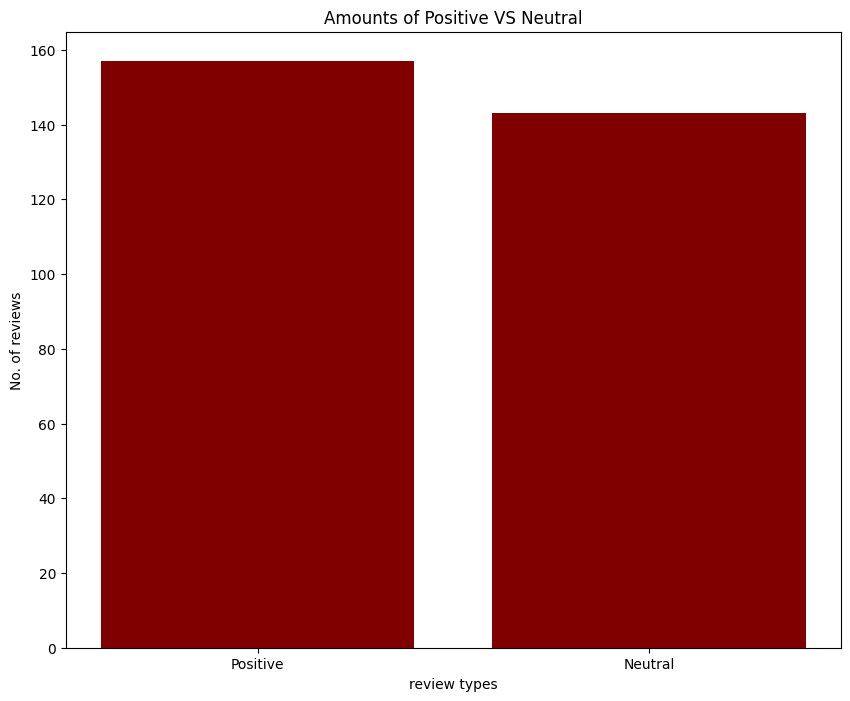

In [85]:
import pandas as pd
from textblob import TextBlob

# ... (Your previous code for data loading and preprocessing) ...

# Assuming 'dataset' is your DataFrame and it contains 'Review Text' column
dataset['Review Text'] = dataset['Review Text'].astype(str)
dataset['polarity'] = dataset['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dataset['subjectivity'] = dataset['Review Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ... (Your previous code for prediction using classifier and adding 'predicted_label' column) ...

# Now, 'dataset' should have the 'predicted_label' column
s = dataset['predicted_label'].value_counts().to_frame()  # Use 'dataset' instead of 'new'
s = s.rename(index={1: 'good review', 0: 'bad review'})
s = s.rename(columns={'predicted_label': 'review count'})  # Rename the column


# --- The fix is here ---
import matplotlib.pyplot as plt  # Pastikan matplotlib.pyplot diimport

plt.figure(figsize=(10, 8))
# Ganti s['review count'] dengan s[s.columns[0]]
# Karena 'review count' adalah nama kolom, dan kita bisa mengaksesnya menggunakan indeks 0 dari s.columns
plt.bar(s.index, s[s.columns[0]], color='maroon')
plt.xlabel("review types")
plt.ylabel("No. of reviews")
plt.title("Amounts of Positive VS Neutral")
plt.show()

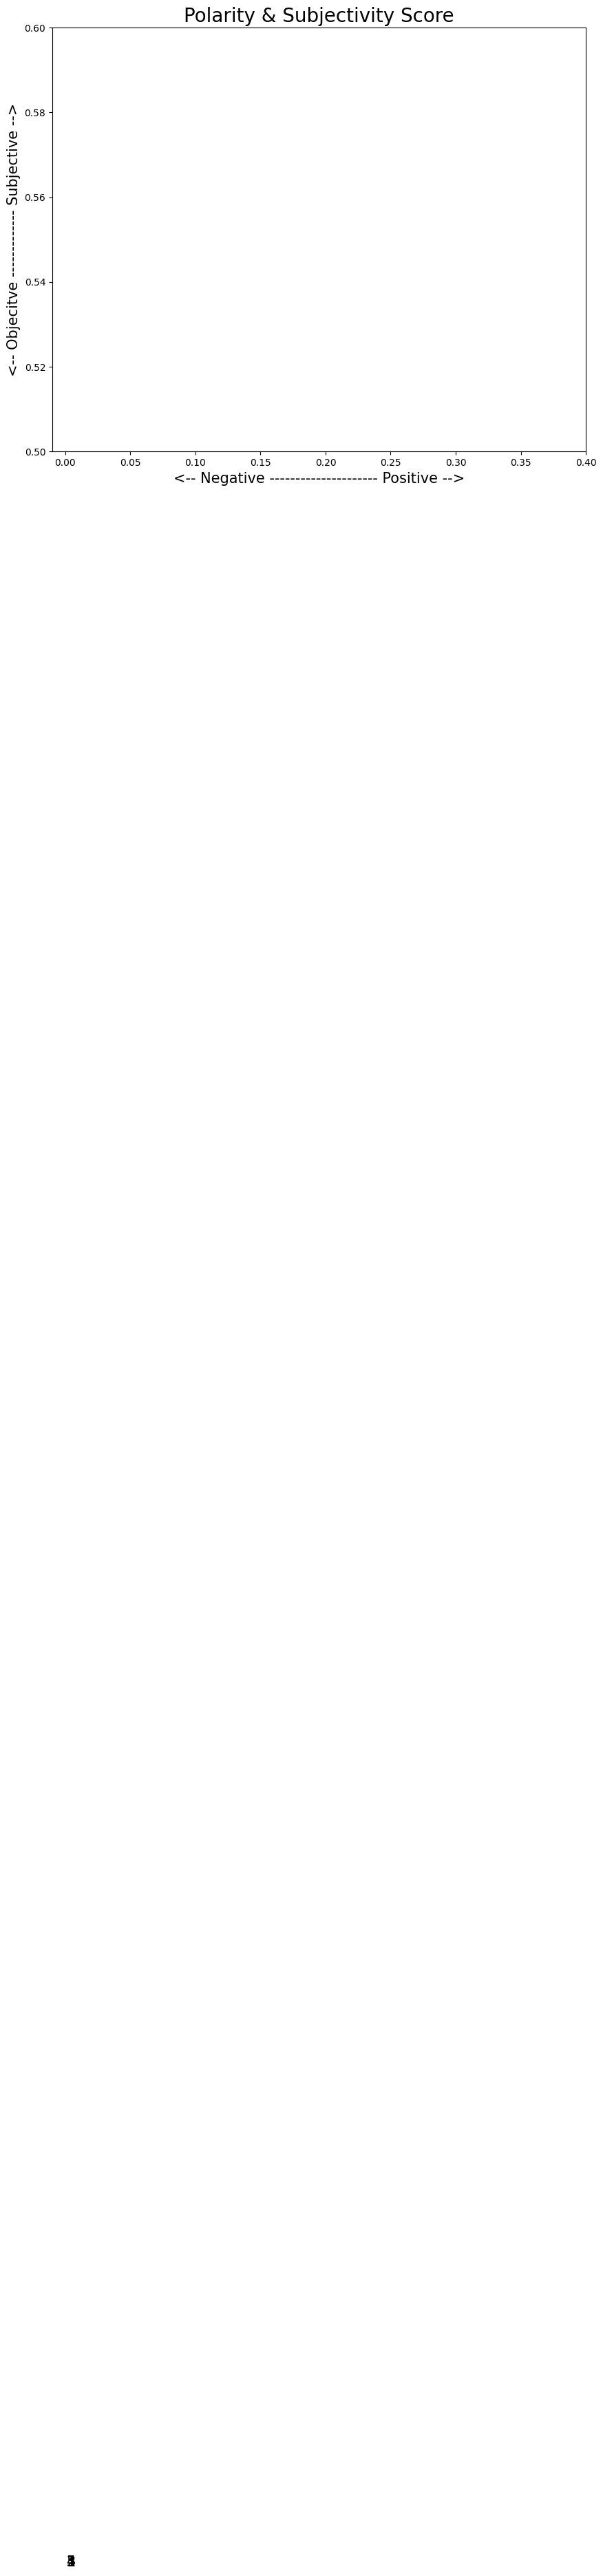

In [98]:
# plot the results
import matplotlib.pyplot as plt

# Assuming 'dataset' contains the polarity and subjectivity columns
sentiment_on_score = dataset[['polarity', 'subjectivity']].head(5) # Select the first 5 rows for demonstration
sentiment_on_score = sentiment_on_score.reset_index()  # Reset the index to start from 0

plt.figure(figsize=(10, 8))

for i in range(len(sentiment_on_score)):  # Iterate through the actual rows of sentiment_on_score
    x = sentiment_on_score.loc[i, 'polarity']
    y = sentiment_on_score.loc[i, 'subjectivity']
    plt.scatter(x, y, color='red')
    plt.text(x + 0.001, y + 0.001, i + 1, fontsize=15)  # Display index + 1 for better readability

plt.xlim(-0.01, 0.4)
plt.ylim(0.5, 0.6)

plt.title('Polarity & Subjectivity Score', fontsize=20)
plt.xlabel('<-- Negative --------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Objecitve ------------- Subjective -->', fontsize=15)

plt.show()

In [104]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# 1. Persiapkan Data
# --- Gunakan dataset dan corpus yang sudah Anda buat sebelumnya ---
# dataset: DataFrame yang berisi 'Review Text' dan 'predicted_label'
# corpus: List yang berisi teks review yang sudah di-preprocessing

# --- Tokenisasi dan Padding ---
max_words = 10000  # Batasi vocabulary maksimum
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

max_length = 100  # Batasi panjang maksimum sequence
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# --- Bagi data menjadi data latih dan data uji ---
# --- Convert 'predicted_label' to numerical using factorize ---
dataset['predicted_label_num'] = pd.factorize(dataset['predicted_label'])[0]
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, dataset['predicted_label_num'], test_size=0.20, random_state=0
)


# --- One-hot encoding untuk target variabel ---
y_train = to_categorical(y_train, num_classes=2)  # Asumsi 2 kelas (0 dan 1)
y_test = to_categorical(y_test, num_classes=2)

# --- Definisikan vocab_size, embedding_dim, dan num_classes ---
vocab_size = max_words
embedding_dim = 128
num_classes = 2

# 2. Buat Model LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

# 3. Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Latih Model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 5. Prediksi pada Data Uji
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# 6. Hitung Akurasi
# --- Convert y_test back to binary format ---
y_test_binary = tf.argmax(y_test, axis=1).numpy()  # Get the original class labels from one-hot encoded y_test
accuracy = accuracy_score(y_test_binary, y_pred)  # Now, both are in binary format
print(f"Akurasi Model LSTM: {accuracy}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.4899 - loss: 0.6970
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.5237 - loss: 0.6934
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.5018 - loss: 0.6939
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.5025 - loss: 0.6928
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.5023 - loss: 0.6927
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.5096 - loss: 0.6756
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.5080 - loss: 0.6777
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.4287 - loss: 0.7024
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.5579 - loss: 0.7144
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.5570 - loss: 0.6969
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step
Akurasi Model LSTM: 0.48333333333333334


In [105]:
!pip install spacy textblob
!python -m spacy download en_core_web_sm

import spacy
from textblob import TextBlob

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def semantic_analysis(text):
    """
    Melakukan semantic analysis pada teks input.

    Args:
        text (str): Teks yang akan dianalisis.

    Returns:
        dict: Dictionary yang berisi informasi semantic analysis.
    """

    # Proses teks dengan spaCy
    doc = nlp(text)

    # Ekstraksi informasi semantik
    entities = [(ent.text, ent.label_) for ent in doc.ents]  # Named entities
    sentiment = TextBlob(text).sentiment  # Sentiment analysis

    # Kembalikan hasil dalam bentuk dictionary
    results = {
        "entities": entities,
        "polarity": sentiment.polarity,  # Polaritas sentimen
        "subjectivity": sentiment.subjectivity  # Subjektivitas sentimen
    }
    return results

# Contoh penggunaan
text = "Apple is looking at buying U.K. startup for $1 billion"
analysis_results = semantic_analysis(text)

print("Named Entities:", analysis_results["entities"])
print("Polarity:", analysis_results["polarity"])
print("Subjectivity:", analysis_results["subjectivity"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Named Entities: [('Apple', 'ORG'), ('U.K.', 'GPE'), ('$1 billion', 'MONEY')]
Polarity: 0.0
Subjectivity: 0.0


In [106]:
!pip install transformers

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'  # You can choose other BERT models as well
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Assuming binary sentiment classification

# Example text for sentiment analysis
text = "This movie is amazing!"

# Preprocess the text
inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)

# Perform sentiment analysis
outputs = model(inputs)
predicted_class = tf.argmax(outputs.logits, axis=1).numpy()[0]

# Print the results
if predicted_class == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Negative sentiment


In [109]:
!pip install transformers

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Fungsi untuk melakukan analisis sentimen dengan BERT
def semantic_analysis_with_bert(text):
    inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
    outputs = model(inputs)
    predicted_class = tf.argmax(outputs.logits, axis=1).numpy()[0]
    return "Positive" if predicted_class == 1 else "Negative"

# Pastikan dataset['Review Text'] bertipe string
dataset['Review Text'] = dataset['Review Text'].astype(str)

# Terapkan fungsi semantic_analysis_with_bert ke kolom 'Review Text'
dataset['bert_sentiment'] = dataset['Review Text'].apply(semantic_analysis_with_bert)

# Tampilkan dataset dengan kolom 'bert_sentiment'
print(dataset[['Review Text', 'bert_sentiment']].head())

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                         Review Text bert_sentiment
0                     packing aman, sesuai deskripsi       Negative
1  Barang sesuai deskripsi dan berfungsi dengan b...       Negative
2  Barang sesuai deskripsi dan berfungsi dengan b...       Negative
3             packing aman, ukuran sesuai, warna oke       Negative
4               packing aman, material bagus, mantap       Negative


In [110]:
!pip install transformers scikit-learn

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 2. Prepare your data
# Assuming 'dataset' is your DataFrame with 'Review Text' and 'predicted_label' columns
texts = dataset['Review Text'].tolist()
labels = dataset['predicted_label'].tolist() # Assuming 0 for negative, 1 for positive

# 3. Split data into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# 4. Tokenize and prepare input for BERT
def preprocess_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True)

train_encodings = preprocess_function(train_texts)
test_encodings = preprocess_function(test_texts)

# 5. Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

# 6. Fine-tune the BERT model (optional, recommended for better accuracy)
# ... (add code for fine-tuning if desired) ...

# 7. Make predictions on the test set
predictions = model.predict(test_dataset.batch(32))
predicted_labels = tf.argmax(predictions.logits, axis=1).numpy()

# 8. Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"BERT Accuracy: {accuracy}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2/2 [==============================] - 163s 70s/step
BERT Accuracy: 0.0


In [111]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['BERT', 'LSTM']
accuracies = [bert_accuracy, lstm_accuracy]

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.title('Perbandingan Akurasi Model BERT dan LSTM')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Mengatur batas sumbu y dari 0 hingga 1

# Menambahkan label nilai akurasi di atas setiap bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', fontsize=12)

plt.show()

NameError: name 'bert_accuracy' is not defined